# Question
How has the relationship between global population growth and temperature changes evolved over the past five decades?

# Data Sources


## Population Data


### Source: 
The world population dataset from Kaggle, contributed by Sourav Banerjee.



### Data Structure and Quality: 
The dataset is a CSV file with columns for 'Country/Territory' and population counts for the years 1970, 1980, 1990, 2000, 2010, and 2020. The data is well-structured, but initial inspection showed that the encoding might cause issues when loading the data.

### License: 
The dataset is available under the Creative Commons Attribution 4.0 International (CC BY 4.0) license. This allows for sharing and adapting the data, provided appropriate credit is given. We will ensure to attribute the dataset properly in our documentation and any subsequent publications.

### Install dependencies


In [1]:
%pip install pandas
%pip install kaggle


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Importing Modules


In [112]:
import os
import shutil
import subprocess
import zipfile
import pandas as pd
import sqlite3
from kaggle.api.kaggle_api_extended import KaggleApi
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

### 1.1 Loading first dataset(world population dataset)
As Dataset come from kaggle, it is need to use of kaggle api and then download and extract the dataset then you are able to load CSV file 

In [91]:

# Set Kaggle environment variables
os.environ['KAGGLE_CONFIG_DIR'] = os.path.expanduser('~/.kaggle')
os.makedirs(os.environ['KAGGLE_CONFIG_DIR'], exist_ok=True)

# Read Kaggle API token information from .gitignore or parent folder file
kaggle_token_info = {}
with open('../.gitignore') as f:
    for line in f:
        if line.strip().startswith('{'):
            kaggle_token_info = json.loads(line.strip())

# Create kaggle.json file with the token
kaggle_config_path = os.path.join(os.environ['KAGGLE_CONFIG_DIR'], 'kaggle.json')
with open(kaggle_config_path, 'w') as f:
    json.dump(kaggle_token_info, f)

# Ensure the cache directory exists
cache_dir = os.path.join(os.environ['KAGGLE_CONFIG_DIR'], 'cache')
os.makedirs(cache_dir, exist_ok=True)

# First Kaggle dataset to download
dataset = 'iamsouravbanerjee/world-population-dataset'
zip_file = 'world-population-dataset.zip'
folder = 'world-population-dataset'

# Instantiate Kaggle API
api = KaggleApi()

# Download and extract
try:
    api.dataset_download_files(dataset, path=folder, unzip=True)
except Exception as e:
    print(f"Error downloading dataset: {e}")
    exit(1)

# Function to read CSV with various encodings
def read_csv_with_encodings(file_path, encodings=['latin1', 'ISO-8859-1', 'cp1252']):
    for enc in encodings:
        try:
            return pd.read_csv(file_path, encoding=enc)
        except Exception as e:
            print(f"Failed to read {file_path} with encoding {enc}: {e}")
    return None

# Load population data
pop_df = read_csv_with_encodings(f'{folder}/world_population.csv')
if pop_df is None:
    print("Failed to read population dataset with all attempted encodings.")
    exit(1)

display(pop_df.head())


Dataset URL: https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset


,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (kmÂ²),Density (per kmÂ²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


### 1.2 Data exploration
We print some basic information about the data and continue our data exploration here.

In [19]:
pop_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (kmÂ²)         

In [21]:
#statistical summary of our data
pop_df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (kmÂ²),Density (per kmÂ²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


### 1.3 Preprocess population data
After loading data From dataset it is needed to cleaning data and drop the elements that are not need to be presence and also it is need to cacluate sum of population in every decade to have world population and Grouth Rate as well.  

In [93]:
# preprocess population data
if pop_df is None:
    print("Failed to read population dataset with all attempted encodings.")
    exit(1)
# Selecting relevant columns
pop_df = pop_df[['Country/Territory', '1970 Population', '1980 Population', '1990 Population', '2000 Population', '2010 Population', '2020 Population']]
# Renaming 'Country/Territory' to 'Country'
pop_df = pop_df.rename(columns={'Country/Territory': 'Country'})
# Melting the dataframe to have 'Year' and 'Population' columns
pop_df = pop_df.melt(id_vars=['Country'], var_name='Year', value_name='Population')
# Extracting the year from the 'Year' column
pop_df['Decade'] = pop_df['Year'].str.extract(r'(\d+)').astype(int)
# Grouping by decade and calculating the sum of the population
pop_df = pop_df.groupby((pop_df['Decade'] // 10) * 10)['Population'].sum().reset_index()
#  growth rate
pop_df['Population Growth Rate'] = pop_df['Population'].pct_change() * 100
#  world population percentage
total_population = pop_df['Population'].sum()
#pop_df['World Population Percentage'] = (pop_df['Population'] / total_population) * 100
display(pop_df)

,Decade,Population,Population Growth Rate
0,1970,3694136661,NaN
1,1980,4442400371,20.255442
2,1990,5314191665,19.624330
3,2000,6147055703,15.672450
4,2010,6983784998,13.611871
5,2020,7839250603,12.249312


### 1.4 Finding missing values


In [34]:
# fetches columns with missing data in our data
pop_df.columns[pop_df.isnull().any()]

Index([], dtype='object')

### 2.1 Loading first dataset
For this  step also it is needed  Download and extract the second dataset(Temprature Dataset)


In [95]:
#loading temprature dataset
# First Kaggle dataset to download
dataset = 'sevgisarac/temperature-change'
zip_file = 'temperature-change.zip'
folder = 'temperature-change'
#donwload and extract temprature dataset 
try:
    api.dataset_download_files(dataset, path=folder, unzip=True)
except Exception as e:
    print(f"Error downloading dataset: {e}")
    exit(1)
# Function to read CSV with various encodings
def read_csv_with_encodings(file_path, encodings=['latin1', 'ISO-8859-1', 'cp1252']):
    for enc in encodings:
        try:
            return pd.read_csv(file_path, encoding=enc)
        except Exception as e:
            print(f"Failed to read {file_path} with encoding {enc}: {e}")
    return None
# Load the full temperature data
temp_df = read_csv_with_encodings('temperature-change/Environment_Temperature_change_E_All_Data_NOFLAG.csv')
if temp_df is None:
    print("Failed to read temperature dataset with all attempted encodings.")
    exit(1)
display(temp_df.head())

Dataset URL: https://www.kaggle.com/datasets/sevgisarac/temperature-change


,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


### 2.2 preprocess temperature data
In this dataset it is needed to calculate average temprature change as world scale and also calculate it for every decade to have same data like poulation Dataset

In [97]:
# Load and preprocess temperature data
temp_df = read_csv_with_encodings('temperature-change/Environment_Temperature_change_E_All_Data_NOFLAG.csv')
if temp_df is None:
    print("Failed to read temperature dataset with all attempted encodings.")
    exit(1)
# Melt the DataFrame to unpivot the yearly temperature columns
temp_df = temp_df.melt(id_vars=['Area', 'Months'], var_name='Year', value_name='Temperature change')
# Extract the year from the 'Year' column and convert it to int
temp_df['Year'] = temp_df['Year'].str.extract(r'(\d+)').astype(float)
temp_df = temp_df.dropna(subset=['Year']).astype({'Year': int})
#  the decade for each year
temp_df['Decade'] = (temp_df['Year'] // 10) * 10
#  the mean temperature change for each decade
avg_temp_decade = temp_df.groupby('Decade')['Temperature change'].mean().reset_index()
# average temperature change for the years 2011 to 2019 and divide by 9
avg_temp_2011_to_2019 = temp_df[temp_df['Year'].between(2011, 2019)]['Temperature change'].mean() 
# Add the calculated value for the 2011-2019 decade to the DataFrame
avg_temp_decade = pd.concat([avg_temp_decade, pd.DataFrame({'Decade': [2020], 'Temperature change': [avg_temp_2011_to_2019]})], ignore_index=True)
# Remove the decade of 1960
avg_temp_decade = avg_temp_decade[avg_temp_decade['Decade'] != 1960]

display(avg_temp_decade)

,Decade,Temperature change
1,1970,0.335612
2,1980,0.446705
3,1990,0.587427
4,2000,0.768479
5,2010,0.939156
6,2020,0.945272


## 3 Merge Preprocessed Datasets
Finally after cleaning data and calculations, to have a better comparation and more clean data it is better to merge both cleanded data 

In [126]:
# Assuming pop_df and avg_temp_decade are already created and merged_df is the merged DataFrame
merged_df = pd.merge(pop_df, avg_temp_decade, on='Decade')
display(merged_df)





,Decade,Population,Population Growth Rate,Temperature change
0,1970,3694136661,NaN,0.335612
1,1980,4442400371,20.255442,0.446705
2,1990,5314191665,19.624330,0.587427
3,2000,6147055703,15.672450,0.768479
4,2010,6983784998,13.611871,0.939156
5,2020,7839250603,12.249312,0.945272


## 4 Visualization

### 4.1 Based on Categorical Variable

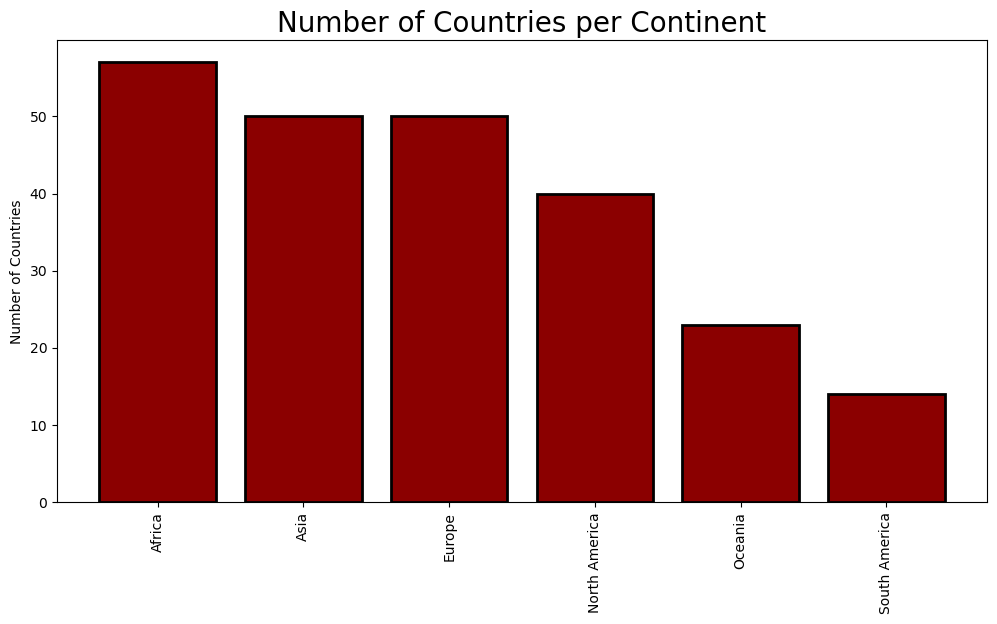

In [128]:
# Load and preprocess population data
pop_df = read_csv_with_encodings('world-population-dataset/world_population.csv')
if pop_df is None:
    print("Failed to read population dataset with all attempted encodings.")
    exit(1)

# Assuming 'Continent' is the column name for continents in your dataset
continents = pop_df["Continent"]

# Count the number of countries in each continent
continents_counts = continents.value_counts()

# Visualize the data
plt.figure(figsize=(12, 6))
plt.bar(continents_counts.index, continents_counts.values, color="darkred", edgecolor="black", linewidth=2)
plt.xticks(rotation="vertical", size=10)
plt.ylabel("Number of Countries")
plt.title("Number of Countries per Continent", size=20)
plt.show()


### 4.2 Based on Numerical Variable

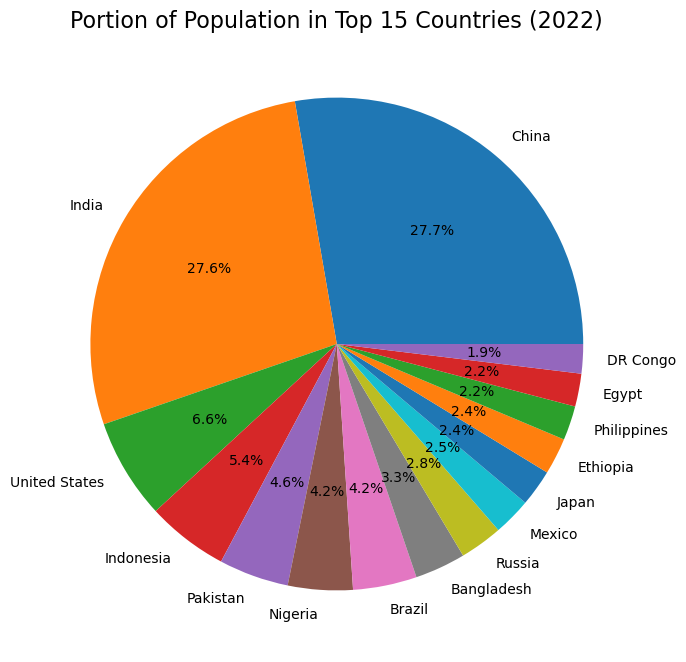

In [170]:
top_15 = pop_df.nlargest(15, '2022 Population')

# Increase the figure size to ensure the chart fits well
plt.figure(figsize=(8, 8))

# Plot the pie chart
plt.pie(top_15['2022 Population'], labels=top_15['Country/Territory'], autopct='%1.1f%%')

# Add title and adjust font size
plt.title('Portion of Population in Top 15 Countries (2022)', fontsize=16)

# Display the plot
plt.show()


### 4.4 Relation Between Population and Temprature change 

Population
<class 'int'>    6
Name: count, dtype: int64
Temperature change
<class 'float'>    6
Name: count, dtype: int64


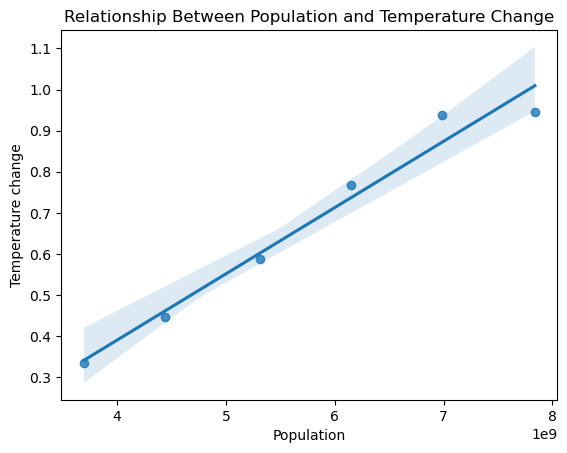

In [118]:
# Check for non-numeric values in 'Population' and 'Temperature change' columns
print(merged_df['Population'].apply(lambda x: type(x)).value_counts())
print(merged_df['Temperature change'].apply(lambda x: type(x)).value_counts())

# Convert columns to numeric and handle errors
merged_df['Population'] = pd.to_numeric(merged_df['Population'], errors='coerce')
merged_df['Temperature change'] = pd.to_numeric(merged_df['Temperature change'], errors='coerce')

# Drop rows with NaN values in 'Population' or 'Temperature change'
merged_df = merged_df.dropna(subset=['Population', 'Temperature change'])

# Plotting the regression plot
ax = sns.regplot(x="Population", y="Temperature change", data=merged_df)

# Setting the title of the plot
ax.set_title("Relationship Between Population and Temperature Change")

# Display the plot
plt.show()